<a href="https://colab.research.google.com/github/KwonDoRyoung/AdvancedBasicEducationProgram/blob/main/abep10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch 제공하는 데이터셋

In [ ]:
import torch.utils.data
import torchvision.transforms as T

from torchvision.datasets import MNIST # class

## MNIST: 손글씨, 아라비아 숫자에 대한, 0 ~ 9
train_dataset = MNIST(root="/content/", transform=T.Compose([T.ToTensor()]), download=True)
test_dataset = MNIST(root="/content/", transform=T.Compose([T.ToTensor()]), train=False)

# MNIST 데이터셋에서 데이터를 호출하면 PIL Image 클래스로 반환
# Pytorch 모델에 입력될 수 있는 데이터 타입은 Tensor
# MNIST 의 PIL Image => Pytorch Tensor 변환 필요
# 변환하는 함수 또는 클래스? 

## Custom 데이터셋 만들기

In [9]:
train_path = '/content/MNIST/mnist_train.csv'
test_path = '/content/MNIST/mnist_test.csv'

- 데이터 확인

      label  1x1  1x2  1x3  1x4  1x5  ...  28x23  28x24  28x25  28x26  28x27  28x28
0         5    0    0    0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
1         0    0    0    0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
2         4    0    0    0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
3         1    0    0    0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
4         9    0    0    0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
...     ...  ...  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...
2289      4    0    0    0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
2290      4    0    0    0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
2291      6    0    0    0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
2292      7    0    0    0  0.0  0.0  ...   64.0    0.0    0.0    0.0    0.0    0.0
2293      6    0    0    0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0

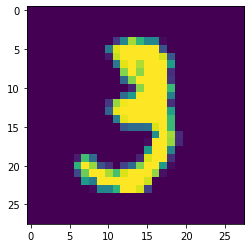

In [8]:
import os
import pandas as pd

train_data = pd.read_csv(train_path)
train_data = train_data.fillna(0) # 데이터를 호출하다보면 NaN 값이 나올 수도 있음 0
print(train_data)
first_data = train_data.loc[10] # 여기 숫자를 바꿔보세요.
print("- pandas 0번째 row 데이터 호출")
print(first_data)
first_data = first_data.tolist()
print("\n- pandas 0번째 row 데이터 리스트로 변환")
print(first_data)
# label 과 데이터로 분리
label = first_data[0]
data = first_data[1:]

import numpy as np
data = np.asarray(data) # 리스트 데이터를 numpy array 로 변환
print("\n-numpy array 변환")
data = data.reshape(28,28) # 이미지로 보기 위한 형태 변환

import matplotlib.pyplot as plt
print(f"\n label: {label}")
plt.imshow(data)

- 학습 및 평가에 활용할 수 있도록 데이터들을 데이터 셋으로 변경하기

In [14]:
import os
import numpy as np
import pandas as pd

train_data = pd.read_csv(train_path)
train_data = train_data.fillna(0)

dataset = [] # train 데이터를 라벨과 데이터로 분리하여 담기위한 리스트(그릇)
for idx in range(len(train_data)):
  _data = train_data.loc[idx]  # 0, 1, 2,3.... 데이터 개수 
  _data = _data.tolist()

  # label 과 데이터로 분리
  label = int(_data[0])
  data = _data[1:]

  dataset.append([label, data])

print("raw data length",len(train_data)) # 6만 
print("dataset length",len(dataset))
# dataset = [[라벨, 데이터], [라벨, 데이터],[라벨, 데이터],[라벨, 데이터],[라벨, 데이터]]

raw data length 2294
dataset length 2294
[[5, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 18.0, 18.0, 18.0, 126.0, 136.0, 175.0, 26.0, 166.0, 255.0, 247.0, 127.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 36.0, 94.0, 154.0, 170.0, 253.0, 253.0, 253.0, 25

- 데이터셋 클래스에 이식하기: 위의 코드 단순히 이식
```python
  from torch.utils.data import Dataset

  class <Class Name>(Dataset):
    def __init__(self, 매개변수1, 매개변수2, *):
      # 학습 또는 평가 데이터를 담아두는 곳. 리스트, 튜플, 딕셔너리 형태 추천
      self.dataset = ... 
      
      # 기타 다른 정보들을 self 변수 선언하여 저장
      # ex)
      self.num_classes = 10

    def __len__(self):
      return len(self.dataset)
    
    def __getitem__(self, idx):
      # __init__ 에서 선언한 데이터를 인덱싱으로 호출.
      # transform 함수를 활용하여 학습에 활용 가능한 형태로 변환 후 리턴함
      # ex)
      image, label = self.dataset[idx]
      
      ...

      return image, label
```

In [23]:
from torch.utils.data import Dataset

class CustomMNIST(Dataset):
  def __init__(self, data_path):
    self.dataset = []
    raw_data = pd.read_csv(data_path).fillna(0)
    
    for idx in range(len(raw_data)):
      _data = raw_data.loc[idx]  
      _data = _data.tolist()

      # label 과 데이터로 분리
      label = int(_data[0])
      data = _data[1:]

      self.dataset.append([data, label])

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    data, label = self.dataset[idx]

    return data, label


In [24]:
train_path = '/content/MNIST/mnist_train.csv'
test_path = '/content/MNIST/mnist_test.csv'

train_dataset1 = CustomMNIST(train_path)
print(train_dataset1)
print(len(train_dataset1)) # len(train_dataset1.dataset)
temp_data, temp_label = train_dataset1[0] # train_dataset1.dataset[0]
print(type(temp_data))
print(temp_label)
print(len(temp_data))

2294
<class 'list'>
5
784


In [ ]:
# 위의 custom dataset은 문제가 있음.
# 무엇이 문제인지 확인.
from torch.utils.data import DataLoader

batch_size = 2
train_loader1 = DataLoader(train_dataset1, batch_size=batch_size)

# 0번째 인덱스 호출한 data0, label0 = [1,2,3,4,5], 5
# 1번째 인덱스 호출한 data1, label1 = [0,9,8,7,6], 1
# 수정한 코드에서는
# 0번째 인덱스 호출한 data0, label0 = tensor[1,2,3,4,5], 5
# 1번째 인덱스 호출한 data1, label1 = tensor[0,9,8,7,6], 1


# data loader 통과 하면

# tensor.concat[label0, label1] = label tensor[5, 1]

# tensor.concat -> [tensor(1,0), tensor(2,9), tensor(3,8), tensor(4,7), tensor(5,6)]
# 우리가 필요한 데이터 형태는 tensor[[1,2,3,4,5],
#                             [0,9,8,7,6]]
for data in train_loader1:
  print(f"data type: {type(data)}") # data is list type
  print(f"data length: {len(data)}")
  
  print(type(data[0]))
  print(type(data[1]))

  print(f"data 0 length: {len(data[0])}")
  print(f"data 0: \n{data[0]}")
  # [tensor( 5에대한 정보), tensor(0 에대한 정보)]
  # 또는 tensor (0: 5에대한 정보, 1: 0에 대한 정보)

  # 실제: [tensor(?, ?), ...., tensor(?,?)] 784
  # 학습에 필요한 형태(size): (batch size, 784)
  print(f"data 1 size: {data[1].size()}")
  print(f"data 1: \n{data[1]}")

  break

data type: <class 'list'>
data length: 2
<class 'list'>
<class 'torch.Tensor'>
data 0 length: 784
data 0: 
[tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float

- 데이터셋 클래스에 이식하기: tensor로 반환하기

In [ ]:
import torch
from torch.utils.data import Dataset

class CustomMNIST2(Dataset):
  def __init__(self, data_path):
    self.dataset = []
    raw_data = pd.read_csv(data_path).fillna(0)

    for idx in range(len(raw_data)):
      _data = raw_data.loc[idx]  
      _data = _data.tolist()

      # label 과 데이터로 분리
      label = int(_data[0])
      data = _data[1:]

      self.dataset.append([data, label])

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    data, label = self.dataset[idx]

    data = torch.tensor(data)

    return data, label

In [ ]:
train_path = '/content/MNIST/mnist_train.csv'
test_path = '/content/MNIST/mnist_test.csv'

train_dataset2 = CustomMNIST2(train_path)
print(len(train_dataset2))
temp_data, temp_label = train_dataset2[0]
print(type(temp_data))
print(temp_label)
print(len(temp_data))

1721
<class 'torch.Tensor'>
5
784


In [ ]:
from torch.utils.data import DataLoader

batch_size = 2
train_loader2 = DataLoader(train_dataset2, batch_size=batch_size)

for data in train_loader2:
  print(f"data type: {type(data)}") # data is list type
  print(f"data length: {len(data)}")
  
  print(type(data[0]))
  print(type(data[1]))

  print(f"data 0 length: {len(data[0])}")
  print(f"data 0: \n{data[0]}")
# ctrl + /
  print(f"data 1 size: {data[1].size()}")
  print(f"data 1: \n{data[1]}")

  break

data type: <class 'list'>
data length: 2
<class 'torch.Tensor'>
<class 'torch.Tensor'>
data 0 length: 2
data 0: 
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
data 1 size: torch.Size([2])
data 1: 
tensor([5, 0])


- Transform 적용

In [ ]:
import torch
from torch.utils.data import Dataset

class CustomMNIST3(Dataset):
  def __init__(self, data_path, transforms=None):
    self.transforms = transforms
    self.dataset = []

    raw_data = pd.read_csv(data_path).fillna(0)
    for idx in range(len(raw_data)):
      _data = raw_data.loc[idx]  
      _data = _data.tolist()

      # label 과 데이터로 분리
      label = int(_data[0])
      data = _data[1:]

      self.dataset.append([data, label])

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    data, label = self.dataset[idx]
    data = np.asarray(data).reshape(28,28)
    
    if self.transforms:
      data = self.transforms(data)

    return data, label

In [ ]:
train_path = '/content/MNIST/mnist_train.csv'
test_path = '/content/MNIST/mnist_test.csv'

import torchvision.transforms as T

transforms = T.ToTensor()

train_dataset3 = CustomMNIST3(train_path, transforms)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 2
train_loader3 = DataLoader(train_dataset3, batch_size=batch_size)

for data in train_loader3:
  print(f"data type: {type(data)}") # data is list type
  print(f"data length: {len(data)}")
  
  print(type(data[0]))
  print(type(data[1]))

  print(f"data 0 length: {len(data[0])}")
  print(f"data 0: \n{data[0]}")

  print(f"data 1 size: {data[1].size()}")
  print(f"data 1: \n{data[1]}")

  break

data type: <class 'list'>
data length: 2
<class 'torch.Tensor'>
<class 'torch.Tensor'>
data 0 length: 2
data 0: 
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], dtype=torch.float64)
data 1 size: torch.Size([2])
data 1: 
tensor([5, 0])
